# Data Glacier Project: G2M insight for Cab Inverstment Firm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce


## 1/ Read csv file

In [3]:
df_cabs = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_customer = pd.read_csv('Customer_ID.csv')
df_trans = pd.read_csv('Transaction_ID.csv')

In [4]:
df_cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## 2/ Convert a column into dates

In [5]:
# a function to convert date of travel column into dates
def convert_excel_time(excel_time):
    return pd.to_datetime('1900-01-01') + pd.to_timedelta(excel_time,'D')

# call and work with the function
df_cabs['Date of Travel']= convert_excel_time(df_cabs['Date of Travel'])
df_cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
df_trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## 3/ Merge csv files 

In [9]:
# Merge the two dataframes, using "Transaction ID" column as key

df_merge_cabs_and_trans = pd.merge(df_trans, df_cabs, on = 'Transaction ID')
df_merge_cabs_and_trans.set_index('Transaction ID', inplace = True)

In [10]:
df_merge_cabs_and_trans.head()

,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
Transaction ID,,,,,,,,
10000011,29290,Card,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
10000012,27703,Card,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
10000013,28712,Cash,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
10000014,28020,Cash,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
10000015,27182,Card,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
# Merge the two dataframes, using "Transaction ID" column as key

df_merge_cabs_and_trans_and_city = pd.merge(df_merge_cabs_and_trans, df_city, on = 'City')
df_merge_cabs_and_trans_and_city.set_index('City', inplace = True)

In [12]:
df_merge_cabs_and_trans_and_city

,Customer ID,Payment_Mode,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Population,Users
City,,,,,,,,,
ATLANTA GA,29290,Card,2016-01-10,Pink Cab,30.45,370.95,313.6350,"814,885","24,701"
ATLANTA GA,27703,Card,2016-01-08,Pink Cab,28.62,358.52,334.8540,"814,885","24,701"
ATLANTA GA,28712,Cash,2016-01-04,Pink Cab,9.04,125.20,97.6320,"814,885","24,701"
ATLANTA GA,28020,Cash,2016-01-09,Pink Cab,33.17,377.40,351.6020,"814,885","24,701"
ATLANTA GA,27182,Card,2016-01-05,Pink Cab,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
WASHINGTON DC,52392,Cash,2018-01-10,Yellow Cab,4.80,69.24,63.3600,"418,859","127,001"
WASHINGTON DC,53286,Cash,2018-01-06,Yellow Cab,8.40,113.75,106.8480,"418,859","127,001"
WASHINGTON DC,52265,Cash,2018-01-07,Yellow Cab,27.75,437.07,349.6500,"418,859","127,001"


In [13]:
#plt.plot(df['Transaction ID'], df['Cost of Trip'])

## 2/ Data cleaning

### Identify and remove duplicates


In [14]:
pd.isnull(df_cabs)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False


In [15]:
df_cabs.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [16]:
df_cabs.drop_duplicates()
#there are no duplicates

df_city.drop_duplicates()
#there are no duplicates

df_customer.drop_duplicates()
#there are no duplicates

df_trans.drop_duplicates()
# there are no duplicates

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


### Perform other analysis like NA value and outlier detection

In [17]:
df_customer['Age'].max()
df_customer['Age'].min()

#to see if there is a typo or an unknown object in the column 'Payment_Mode'
df_trans['Payment_Mode'].drop_duplicates()


#to see if there is a typo or an unknown object in the column 'Gender'
df_customer['Gender'].drop_duplicates()

# to see if we have the population and user information for every city in the cabs dataset
df_cabs['City'].drop_duplicates().count() == df_city["City"].count()-1


True

In [18]:
pd.isnull(df_cabs).sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

## 3/ Descriptive statistics of all tables


In [19]:
df_cabs[["KM Travelled","Price Charged","Cost of Trip"]].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [20]:
df_customer["Age"].describe()

count    49171.000000
mean        35.363121
std         12.599066
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64

## 4/ Add column Profit to cabs dataframe

In [21]:
df_cabs['Profit'] = df_cabs['Price Charged']- df_cabs["Cost of Trip"]
df_cabs

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [22]:
Pink_cabs_data = df_cabs[df_cabs['Company'] == 'Pink Cab']
Yellow_cabs_data = df_cabs[df_cabs['Company'] == 'Yellow Cab']


# df_cabs["Profit"].describe()

Pink_cabs_data["Profit"].describe()
# Yellow_cabs_data["Profit"].describe()



count    84711.000000
mean        62.652174
std         77.590378
min       -220.060000
25%         11.206000
50%         41.500000
75%         93.965000
max       1119.480000
Name: Profit, dtype: float64

## Cabs plots

In [23]:
#show the last items in the dataframe
df_cabs.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420
359391,10440107,2018-01-04,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,13.9608


In [24]:
# Show the data of the yellow cabs company
Yellow_cabs_data = df_cabs[df_cabs['Company'] == 'Yellow Cab']
Yellow_cabs_data
# Show the data of the yellow cabs company

Pink_cabs_data = df_cabs[df_cabs['Company'] == 'Pink Cab']
Pink_cabs_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844
...,...,...,...,...,...,...,...,...
357449,10437610,2018-01-08,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,48.590
357450,10437611,2019-01-02,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,85.344
357451,10437612,2018-01-09,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,58.390
357452,10437614,2018-01-04,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,31.560


In [25]:
# figsize=(16, 9)
# plt.plot(Pink_cabs_data['KM Travelled'], np.arange(len(Pink_cabs_data['KM Travelled'])),figsize=(16, 9))
# #plt.bar(Pink_cabs_data['City'], Pink_cabs_data['KM Travelled'])
# plt.show()


In [26]:
Y= Pink_cabs_data
plt.figure(figsize=(12, 4))

barWidth = 0.5
#plt.bar(np.arange(len(Pink_cabs_data)), Pink_cabs_data, width=barWidth, color='#00b894', label='Pink cabs')
#plt.bar(np.arange(len(Yellow_cabs_data)), Yellow_cabs_data, width=barWidth, color='#e17055', bottom=Y, label='Yellow cabs')

#plt.legend()
#plt.show()

<Figure size 864x288 with 0 Axes>

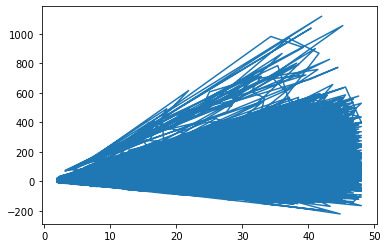

In [27]:
plt.plot(Pink_cabs_data['KM Travelled'], Pink_cabs_data['Profit'])

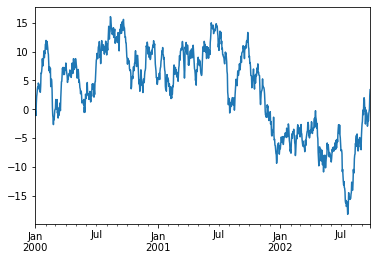

In [28]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts.plot();


In [ ]:
# df_cabs.index=df_cabs['Date of Travel']
# df_cabs.cumsum()
# plt.figure();
# df_cabs.plot()

In [ ]:
# plt.plot(df_cabs['Company'],df_cabs['Profit'])

## Does margin proportionally increase with increase in number of customers?


## What are the attributes of these customer segments?


In [34]:
### Correlation between attributes

<AxesSubplot:>

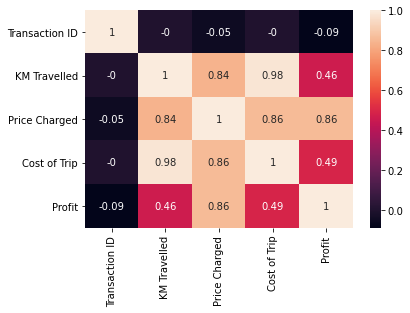

In [35]:
sns.heatmap(np.round(df_cabs.corr(),2), annot=True)

In [36]:
  # Finding Common columns between cabs and transaction tables
a = np.intersect1d(df_trans.columns, df_cabs.columns)
 
# Printing common columns
print ("Common Columns:",a)

Common Columns: ['Transaction ID']


In [37]:
df_merge_cabs_and_trans = pd.merge(df_trans, df_cabs, on = 'Transaction ID')
# df_merge_cabs_and_trans.set_index('Transaction ID', inplace = True)
df_merge_cabs_and_trans

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,27703,Card,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,28712,Cash,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,28020,Cash,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,27182,Card,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,53286,Cash,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,52265,Cash,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,52175,Card,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [38]:
  # Finding Common columns between df_merge_cabs_and_trans and customer data
a = np.intersect1d(df_merge_cabs_and_trans.columns, df_customer.columns)
 
# Printing common columns
print ("Common Columns:",a)

Common Columns: ['Customer ID']


In [39]:
df_merge_cabs_and_trans_and_customer = pd.merge(df_customer, df_merge_cabs_and_trans, on = 'Customer ID')
df_merge_cabs_and_trans_and_customer

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,29290,Male,28,10813,10000011,Card,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,2018-01-09,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,12490,Male,33,18713,10439799,Cash,2018-01-05,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,41414,Male,38,3960,10439838,Card,2018-01-06,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,41677,Male,23,19454,10439840,Cash,2018-01-08,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


C:\Users\21694\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of transaction by gender for each company'}, xlabel='Company', ylabel='count'>

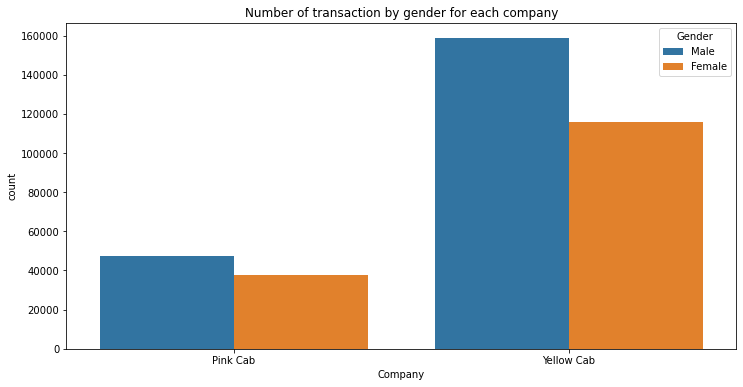

In [40]:
plt.figure(figsize=(12, 6))
plt.title('Number of transaction by gender for each company')
sns.countplot(df_merge_cabs_and_trans_and_customer['Company'], hue = df_merge_cabs_and_trans_and_customer['Gender'])

C:\Users\21694\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of transaction by payment mode for each company'}, xlabel='Company', ylabel='count'>

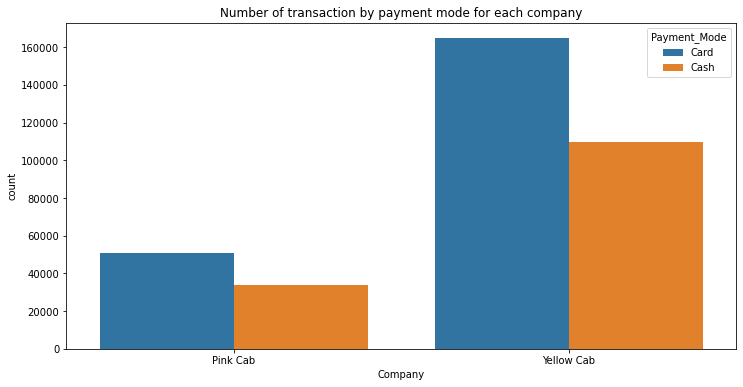

In [41]:
plt.figure(figsize=(12, 6))
plt.title('Number of transaction by payment mode for each company')
sns.countplot(df_merge_cabs_and_trans_and_customer['Company'], hue = df_merge_cabs_and_trans_and_customer['Payment_Mode'])

In [84]:
df_merge_cabs_and_trans_and_customer['Profit'] = df_merge_cabs_and_trans_and_customer['Price Charged']- df_merge_cabs_and_trans_and_customer["Cost of Trip"]
df=df_merge_cabs_and_trans_and_customer
df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,29290,Male,28,10813,10000011,Card,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,2018-01-09,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,12490,Male,33,18713,10439799,Cash,2018-01-05,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,41414,Male,38,3960,10439838,Card,2018-01-06,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,41677,Male,23,19454,10439840,Cash,2018-01-08,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [45]:
# # a function to convert date of travel column into dates
# def convert_excel_time(excel_time):
#     return pd.to_datetime('1900-01-01') + pd.to_timedelta(excel_time,'D')

# # call and work with the function
# df_merge_cabs_and_trans_and_customer['Date of Travel']= convert_excel_time(df_merge_cabs_and_trans_and_customer['Date of Travel'])
# df_merge_cabs_and_trans_and_customer.head()

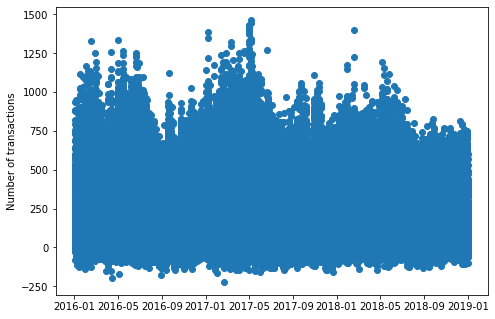

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(df_merge_cabs_and_trans_and_customer['Date of Travel'] ,df_merge_cabs_and_trans_and_customer['Profit'])
plt.ylabel('Number of transactions')
plt.show()

## PROFiT VS KM TRAVELLES

In [47]:
df=pd.DataFrame()
df['kilometrage']= df_merge_cabs_and_trans_and_customer['KM Travelled']
df['Profit']= df_merge_cabs_and_trans_and_customer['Profit']
df

,kilometrage,Profit
0,30.45,57.3150
1,26.19,281.2772
2,42.55,194.6480
3,28.62,23.6660
4,36.38,253.9808
...,...,...
359387,16.66,47.2656
359388,13.72,105.0980
359389,19.00,71.2100
359390,5.60,21.8600


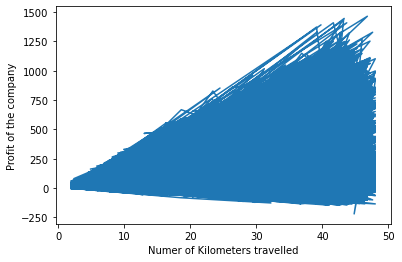

In [48]:

plt.plot(df['kilometrage'][:170000],df['Profit'][:170000])

plt.ylabel('Profit of the company')
plt.xlabel('Numer of Kilometers travelled')

plt.show()

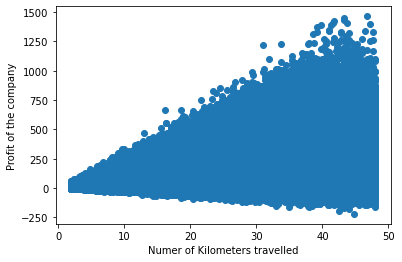

In [49]:
plt.scatter(df['kilometrage'][:359392],df['Profit'][:359392])

plt.ylabel('Profit of the company')
plt.xlabel('Numer of Kilometers travelled')

plt.show()

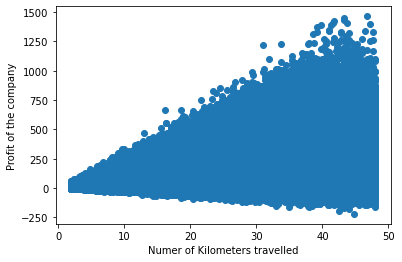

In [50]:
plt.scatter(df['kilometrage'],df['Profit'])

plt.ylabel('Profit of the company')
plt.xlabel('Numer of Kilometers travelled')

plt.show()

## Which company has maximum cab users at a particular time period?

In [87]:
# df1=pd.DataFrame()
# df1['date']= df_merge_cabs_and_trans_and_customer['Date of Travel']
# df1['Company']= df_merge_cabs_and_trans_and_customer['Company']
# df1['Customer ID']=df_merge_cabs_and_trans_and_customer['Customer ID']
# df1


In [88]:
start_date = "2016-05-1"
end_date = "2016-10-31"

after_start_date = df["Date of Travel"] >= start_date
before_end_date = df["Date of Travel"] <= end_date
between_two_dates = after_start_date & before_end_date
df_2016 = df.loc[between_two_dates]
df_2016

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
8,28712,Male,53,11242,10079404,Card,2016-09-23,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,210.0920
12,28020,Male,23,23327,10094994,Cash,2016-10-29,Pink Cab,ATLANTA GA,41.44,522.14,484.8480,37.2920
20,27318,Male,25,13984,10072285,Card,2016-09-06,Pink Cab,ATLANTA GA,45.20,539.01,479.1200,59.8900
25,33788,Male,23,23788,10092514,Card,2016-10-17,Yellow Cab,AUSTIN TX,17.70,401.68,250.6320,151.0480
33,59799,Male,33,19271,10085980,Cash,2016-10-03,Yellow Cab,BOSTON MA,35.84,782.10,477.3888,304.7112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320530,20644,Male,22,14076,10101223,Card,2016-10-31,Yellow Cab,SAN DIEGO CA,43.66,709.37,544.8768,164.4932
320581,13284,Female,51,6580,10101539,Card,2016-10-31,Yellow Cab,SILICON VALLEY,14.30,407.02,197.3400,209.6800
320585,14873,Male,59,14155,10101542,Cash,2016-10-31,Yellow Cab,SILICON VALLEY,29.12,892.23,363.4176,528.8124
320614,14707,Female,23,13815,10101556,Card,2016-10-31,Yellow Cab,SILICON VALLEY,44.07,1322.21,634.6080,687.6020


In [106]:
df_2016_pink= df_2016[df_2016['Company']=='Pink Cab']
number_of_customers_2016_pink=df_2016_pink.shape[0]-1
number_of_customers_2016_pink

13740

In [107]:
df_2016_yellow= df_2016[df_2016['Company']=='Yellow Cab']
number_of_customers_2016_yellow=df_2016_yellow.shape[0]-1
number_of_customers_2016_yellow

43002

C:\Users\21694\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

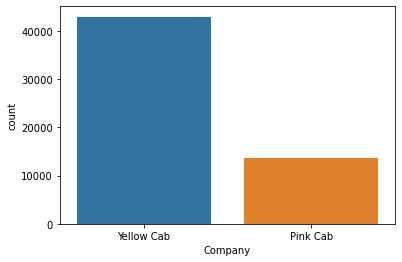

In [109]:
sns.countplot(df_2016['Company'])